EDA(Exploratory Data Analysis-EDA)

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


In [2]:
datos = pd.read_csv('Datos\movies_data.csv', low_memory=False)
datos.head()


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,collection_name,release_year,return
0,11000000,"Adventure, Action, Science Fiction",11,en,Princess Leia is captured and held hostage by ...,42.149697,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1977-05-25,775398007.0,121.0,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,Star Wars Collection,1977,70.490728
1,18000000,"Adventure, Action, Science Fiction",1891,en,"The epic saga continues as Luke Skywalker, in ...",19.470959,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1980-05-17,538400000.0,124.0,English,Released,The Adventure Continues...,The Empire Strikes Back,8.2,Star Wars Collection,1980,29.911111
2,32350000,"Adventure, Action, Science Fiction",1892,en,As Rebel leaders map their strategy for an all...,14.586087,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1983-05-23,572700000.0,135.0,English,Released,The Empire Falls...,Return of the Jedi,7.9,Star Wars Collection,1983,17.703246
3,115000000,"Adventure, Action, Science Fiction",1893,en,"Anakin Skywalker, a young slave strong with th...",15.649091,Lucasfilm,United States of America,1999-05-19,924317558.0,136.0,English,Released,Every generation has a legend. Every journey h...,Star Wars: Episode I - The Phantom Menace,6.4,Star Wars Collection,1999,8.037544
4,120000000,"Adventure, Action, Science Fiction",1894,en,"Ten years after the invasion of Naboo, the gal...",14.072511,Lucasfilm,United States of America,2002-05-15,649398328.0,142.0,English,Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,6.4,Star Wars Collection,2002,5.411653


In [3]:
datos.isna().sum().sort_values()

budget                      0
vote_average                0
title                       0
release_year                0
release_date                0
revenue                     0
id                          0
popularity                  0
return                      0
original_language          11
status                     80
runtime                   246
overview                  941
genres                   2384
spoken_languages         3891
production_countries     6211
production_companies    11796
tagline                 24978
collection_name         40888
dtype: int64

<Axes: >

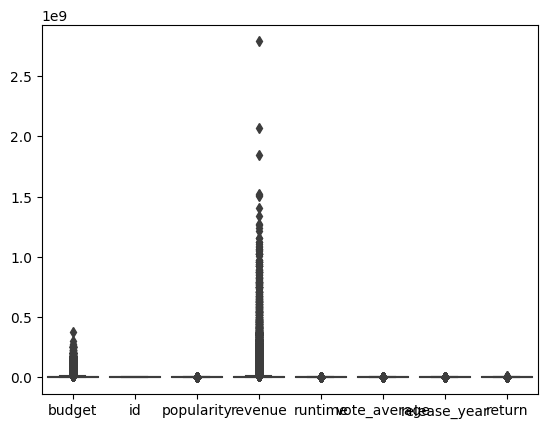

In [4]:
# Control de outliers

numeric_cols = datos.select_dtypes(include=['float64', 'int64'])

stats = numeric_cols.describe()

q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = (numeric_cols < lower_limit) | (numeric_cols > upper_limit)

sns.boxplot(data=numeric_cols[outliers.any(axis=1)])


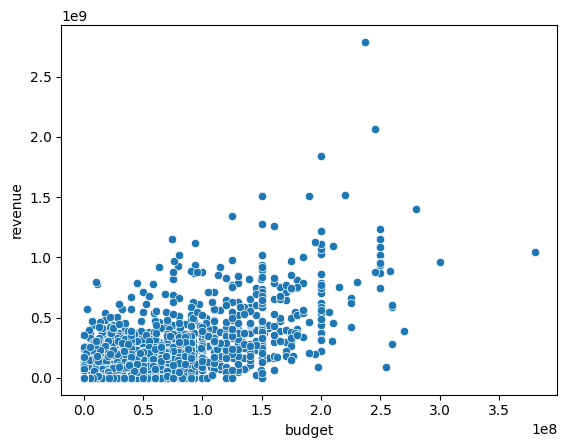

In [5]:
sns.scatterplot(x='budget', y='revenue', data=datos)
plt.show()


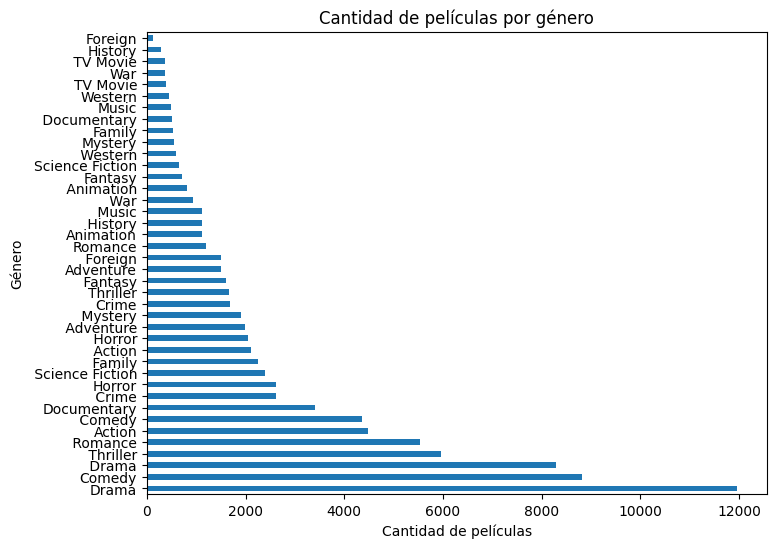

In [6]:
datos['genres_list'] = datos['genres'].str.split(',')

genres_df = datos.explode('genres_list')

counts = genres_df['genres_list'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()


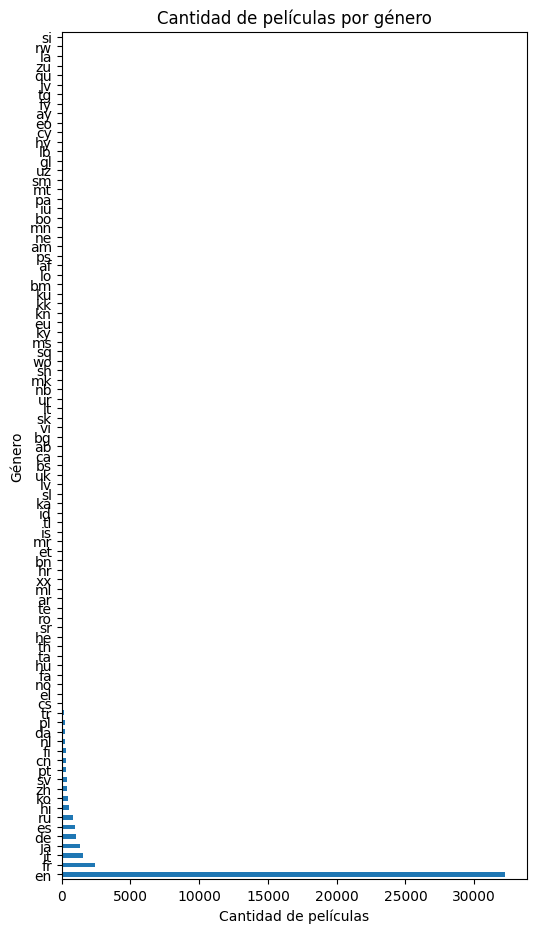

In [7]:
datos['original_list'] = datos['original_language'].str.split(',')

original_df = datos.explode('original_list')

countsoriginal = original_df['original_list'].value_counts()

plt.figure(figsize=(6, 11))
countsoriginal.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()


In [8]:
# Columnas para usar de recomendacion genres, popularity, vote_average y spoken_languages.
# Se dejan solo las columnas a utilizarpara 
datos.dropna(subset=['genres'], inplace=True)
ColumnasMl = datos[["genres", "popularity","vote_average", "spoken_languages"]]
print(ColumnasMl.columns)


Index(['genres', 'popularity', 'vote_average', 'spoken_languages'], dtype='object')


In [9]:
# Guardamos en un archivo csv los cambio para que trabaje ML
ColumnasMl.to_csv('Datos\movies_dataML.csv', index=False)


In [16]:
#Cargamos el archivo para ML con el modelo de K-Vecinos
 
datom_c = pd.read_csv("Datos\movies_dataML.csv", low_memory=False)


genres_encoded = datom_c["genres"].str.get_dummies(sep=", ")
language_encoded = datom_c["spoken_languages"].str.get_dummies(sep=",")

datom_c = pd.concat([language_encoded,genres_encoded, datom_c[["popularity", "vote_average"]]], axis=1)

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(datom_c)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

model = NearestNeighbors()
model.fit(X_scaled)





NearestNeighbors()

In [19]:
# Usuario ingrea el titulo / Ejemplo: Ingresa "Star wars"
titulo = input()

In [24]:
movie_index = datos[datos['title'] == titulo].index[0]
X_movie = X_scaled[movie_index].reshape(1, -1)

distances, indices = model.kneighbors(X_movie)
Recomendacion = datos.iloc[indices[0]]['title'].tolist()
print(Recomendacion)


['Star Wars', 'Guardians of the Galaxy', 'The Empire Strikes Back', 'Return of the Jedi', 'Captain America: The Winter Soldier']


In [26]:
# Entonces la funcion de Recomendacion quedaria asi
def recomendacion(titulo: str):
    '''Ingresas un nombre de película y te recomienda 5 similares'''

    movie_index = datos[datos['title'] == titulo].index[0]

    X_movie = X_scaled[movie_index].reshape(1, -1)

    distances, indices = model.kneighbors(X_movie)
    Recomendacion = datos.iloc[indices[0]]['title'].tolist()

    respuesta = {}
    for i, movie in enumerate(Recomendacion[:5]):
        respuesta[str(i+1)] = str(movie)

    return {'Las Películas Recomendadas son': respuesta}


In [23]:

recomendacion("Star Wars")


{'Las Películas Recomendadas son': {'1': 'Star Wars',
  '2': 'Guardians of the Galaxy',
  '3': 'The Empire Strikes Back',
  '4': 'Return of the Jedi',
  '5': 'Captain America: The Winter Soldier'}}